In [2]:
!pip install numpy matplotlib scipy pyaca

In [3]:
import pyACA
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


/Users/vedant/miniconda3/lib/python3.9/site-packages/pyACA/ToolReadAudio.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [f_s, x] = wavread(cAudioFilePath)


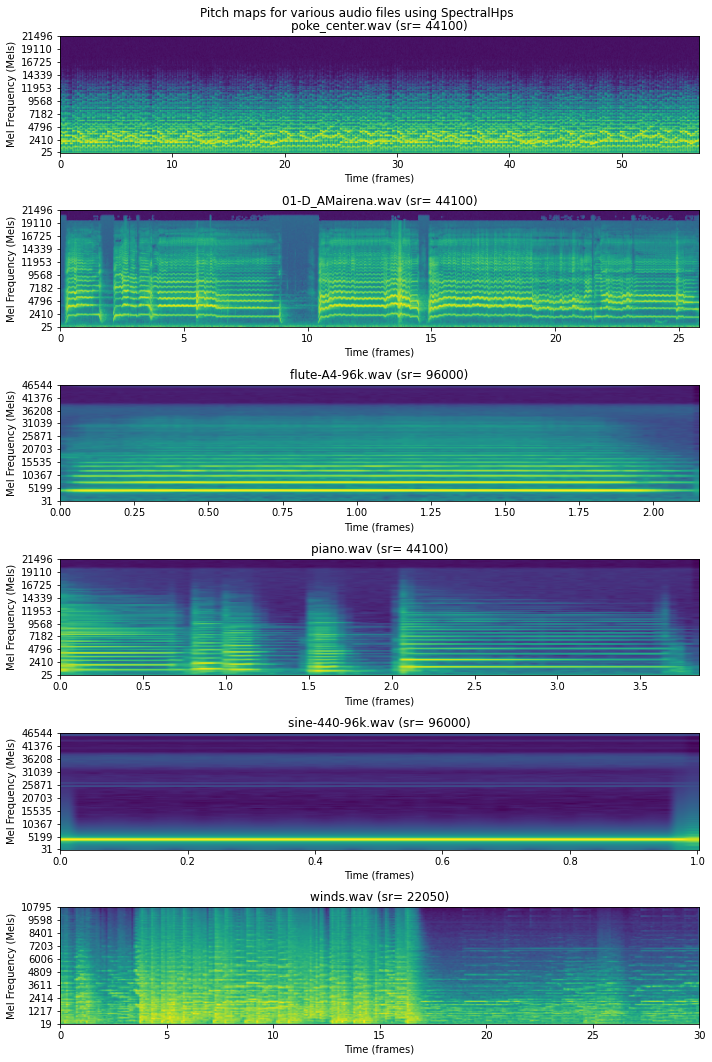

In [35]:
def amplitude_to_db(x):
    return 20*np.log10(x/np.max(x))

file_names = ['poke_center.wav','01-D_AMairena.wav','flute-A4-96k.wav','piano.wav','sine-440-96k.wav', 'winds.wav']
fig,axs = plt.subplots(len(file_names),1,figsize=(10,15))
fig.suptitle('Pitch maps for various audio files using SpectralHps')
for idx, fname in enumerate(file_names):
    f_s, x = pyACA.ToolReadAudio('../audio/'+fname)
    M, f_c, t = pyACA.computeMelSpectrogram(x, f_s, bLogarithmic=False, iBlockLength=4096, iHopLength=2048)
    extent = [0, t[-1], 0, f_c[-1]]  # Adjust the extent parameter
    axs[idx].imshow(amplitude_to_db(M), origin='lower', aspect='auto', extent=extent)  # Pass extent parameter
    axs[idx].set_title(fname+f" (sr= {f_s})")
    yticks = np.linspace(f_c[0], f_c[-1], 10)
    axs[idx].set_yticks(yticks)
    axs[idx].set_ylim([0, f_c[-1]])  # Set the y-axis limit based on the maximum frequency
for ax in axs.flat:
    ax.set(xlabel='Time (frames)', ylabel='Mel Frequency (Mels)')
fig.tight_layout()